# Allen - Cahn Equation 

The microstructure paramter is considered to be $\phi$. 

And the free energy functional becomes 

> $\mathscr{F} = \int F dv$

where 
F = $\int{f_{0}(\phi) + \kappa |\nabla \phi|^{2}}$ and $f_{0} = \phi^{2}(1-\phi)^{2}$

Hence the Allen-Cahn equation becomes 

> $ \frac{\partial \phi}{\partial t}$ = $ -L( \frac{\partial f_{0}}{\partial \phi} - 2 \kappa \nabla ^{2} \phi)$

Again we consider all the constants as 1.0 because of non-dimensionalization. 

Taking the fourier transform of the equation we get 

> $\tilde \phi ^{t + \Delta t}$ = $\frac {\tilde \phi ^{t} - L \Delta t \tilde g} {1 + 2\kappa Lk^{2}} $ 

In [4]:
# importing libraries 
import numpy as np
from matplotlib import pyplot as plt

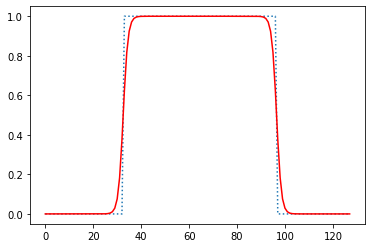

In [5]:
# defining parameters 
kappa = 1.0
L = 1.0
A = 1.0

N = 128 # no of grid points
dx = 1.0 # grid size

# initial profile 
phi = np.zeros(N)

for i in range (int(N/4 + 1), int(3*N/4 + 1)) :
    phi[i] = 1.0

# plotting 
plt.plot(phi, linestyle = "dotted") 

# defining reciprocal space parameters 

halfN = N/2
delk = 2 * np.pi / N
dt = 0.5
g = np.zeros(N)
ghat = np.zeros(N)
phihat = np.zeros(N)

for m in range(0,500) : # running the time-loop
    # evolution 
    for k in range (0,N) :
        g[k] = 2 * A * phi[k] * (1-phi[k]) * (1 - 2*phi[k])
    
    ghat = np.fft.fft(g)
    phihat = np.fft.fft(phi)

    for i in range (0,N) :
        # defining PBCs
        if (i <= halfN) :
            k = i * delk
        if (i > halfN) :
            k = (i-N) * delk
        
        k2 = k ** 2
        # evolution in fourier space
        phihat[i] = (phihat[i] - L * dt * ghat[i])/(1 + 2 * kappa * L * dt * k2)
        
    phi = np.real(np.fft.ifft(phihat)) 
# plotting the final profie 
plt.plot(phi, color = "red")  